# <font color='blue'>Machine Learning</font>

# <font color='blue'>Regressão</font>

#### Exercício: 

Parte 1: Código para a fórmula básica da regressão linear simples, calculando os coeficientes. 

Parte 2: Modelo de previsões.

O dataset abaixo contém dados sobre...

In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Carregando os dados
data = pd.read_csv('dados/dados1975-2015.csv')
data.head()

,ano,mes,chuva,evaporacao,insolacao,tempmed,umidrel,tempmax_abs,tempmax_med,tempmin_abs,tempmin_med
0,1975.0,1.0,136.0,134.9,224.7,24.2,70.9,34.4,30.7,14.6,18.9
1,1975.0,2.0,242.9,104.4,195.3,25.3,76.9,36.2,30.4,16.8,21.1
2,1975.0,3.0,125.1,101.1,192.8,23.9,79.1,33.7,29.9,17.3,19.7
3,1975.0,4.0,98.9,156.8,201.5,21.0,75.0,30.6,26.8,13.4,16.8
4,1975.0,5.0,66.3,95.5,203.6,18.1,72.1,29.0,23.8,9.0,14.3


In [31]:
# Definindo variáveis x e y
X = data['ano'].values
Y = data['chuva'].values

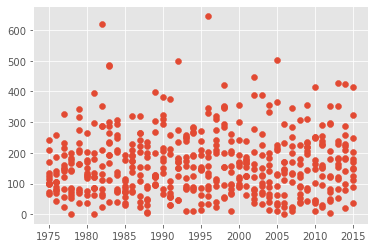

In [32]:
#Chamando a Função e mostrando o grafico 
plt.scatter(X,Y)
plt.show()

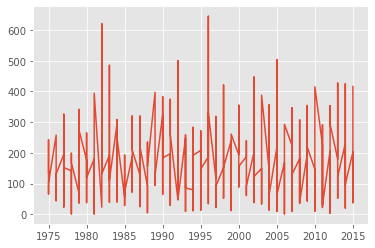

In [33]:
plt.plot(X,Y)
plt.show()

In [9]:
plt.style.use("ggplot")

In [10]:
# Calculando os Coeficientes

# Média de x e y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Número total de valores
n = len(X)

# Usando a fórmula para calcular a e b
numer = 0
denom = 0

for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2

b = numer / denom
a = mean_y - (b * mean_x)

# Imprimindo os coeficientes
print(a, b)

nan nan


In [ ]:
# Fazendo previsões

# y = a + bx

y = 325.57 + (0.26 * 4450)
print("O ....:", y)

# Fim

### Obrigado 